CONFIDENTIEL

Installation des dépendances

In [55]:
%pip install azure-storage-blob
%pip install pyyaml
%pip install praat-parselmouth
%pip install matplotlib
%pip install seaborn
%pip install azure-cognitiveservices-speech


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 823.2 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Replace with your local path, for example:
# /Users/elodieroyant/Documents/StudioVRAI/hackatech
LOCAL_PATH = input()

In [1]:
# import env variables (you should retrieve env in secure notes and save as a .env.yaml file at root file)
import yaml

env = {}
with open('.env.yaml', 'r') as stream:
    for row in yaml.safe_load(stream).split(' '):
        env[row.split(':')[0]] = row.split(':')[1]

In [136]:
# Download a file from blob storage on local path
from azure.storage.blob import BlobServiceClient

# Create a BlobServiceClient object using your connection string
blob_service_client = BlobServiceClient.from_connection_string(env['AZURE_BLOB_STORAGE_CONNECTION_STRING'])
# Specify the container name and blob name
container_name = "data-csv"

blob_name = "tchatche_split_x.csv"
# Get a reference to the blob
blob_client = blob_service_client.get_blob_client(container_name, blob_name)

# Download the blob content
downloaded_content = blob_client.download_blob().readall()

# Save the downloaded content to a file
with open(LOCAL_PATH  + f"/data-csv/{blob_name}", "wb") as file:
    file.write(downloaded_content)

In [140]:
import csv

with open(LOCAL_PATH + f"/data-csv/tchatche_split_x.csv", newline='') as csv_file:
    reader = csv.DictReader(csv_file)
    file_names = []
    for row in reader:
        if (row['file_name'] not in file_names):
            file_names.append(row['file_name'])

# 145 file_names
print(len(file_names), file_names)

145 ['QG_20230404144514_1_1071010_1342160_1283_32095.wav', 'QG_20230404144514_1_1071010_1342160_39370_43863.wav', 'QG_20230404144514_1_1071010_1342160_74461_87300.wav', 'QG_20230404144514_1_1071010_1342160_124958_130308.wav', 'QG_20230404144514_1_1071010_1342160_144858_182089.wav', 'QG_20230404144514_1_1071010_1342160_196852_212258.wav', 'QG_20230404144514_1_3329410_3583690_9046_55482.wav', 'QG_20230404144514_1_3329410_3583690_55884_129257.wav', 'QG_20230404144514_1_3583690_3797250_20308_94436.wav', 'QG_20230404144514_1_3583690_3797250_171102_207828.wav', 'QG_20230404144514_1_3797250_4028770_137623_206435.wav', 'QG_20230404144514_1_4028770_4294050_15414_131582.wav', 'QG_20230404144514_1_4294050_4542500_10015_96191.wav', 'QG_20230404144514_1_4294050_4542500_131872_170682.wav', 'QG_20230404144514_1_4294050_4542500_180072_203859.wav', 'QG_20230404144514_1_4542500_4770840_10376_82629.wav', 'QG_20230404144514_1_4542500_4770840_196965_226942.wav', 'QG_20230404144514_1_4770840_5020310_13032_1

In [ ]:
# Download all audio files
from azure.storage.blob import BlobServiceClient

# Create a BlobServiceClient object using your connection string
blob_service_client = BlobServiceClient.from_connection_string(env['AZURE_BLOB_STORAGE_CONNECTION_STRING'])
# Specify the container name and blob name
container_name = "raw-audio"

for blob_name in file_names:
    print(blob_name)
    # Get a reference to the blob
    blob_client = blob_service_client.get_blob_client(container_name, blob_name)

    # Download the blob content
    downloaded_content = blob_client.download_blob().readall()

    # Save the downloaded content to a file
    with open(LOCAL_PATH + f"/raw-audio/{blob_name}", "wb") as file:
        file.write(downloaded_content)
    print(LOCAL_PATH + f"/raw-audio/{blob_name}")


In [24]:
# quick descriptive statistics
import csv

with open(LOCAL_PATH + f"/data-csv/tchatche_split.csv", newline='') as csv_file:
    reader = csv.DictReader(csv_file)
    high_scores = []
    low_scores = []
    for row in reader:
        if (int(row['rating'])> 7):
            high_scores.append(row['file_name'])
        elif (int(row['rating']) < 2):
            low_scores.append(row['file_name'])

# 5 file_names
print(len(high_scores), high_scores)
# 56 file_names
print(len(low_scores), low_scores)

5 ['QG_20230404144514_1_1071010_1342160_39370_43863.wav', 'QG_20230404144514_1_1071010_1342160_144858_182089.wav', 'QG_20230404144514_1_3329410_3583690_9046_55482.wav', 'QG_20230502144519_1_2836480_3092010_56442_68218.wav', 'QG_20230502144519_1_677440_913090_11094_123731.wav']
29 ['QG_20230411144521_1_1294510_1540700_58812_75288.wav', 'QG_20230411144521_1_27170_276170_160155_191522.wav', 'QG_20230411144521_1_2852380_3060700_62340_88816.wav', 'QG_20230411144521_1_2852380_3060700_88969_113906.wav', 'QG_20230411144521_1_2852380_3060700_121140_142844.wav', 'QG_20230411144521_1_3060700_3328720_6341_59256.wav', 'QG_20230411144521_1_3328720_3589780_24710_36294.wav', 'QG_20230411144521_1_3328720_3589780_129925_189772.wav', 'QG_20230411144521_1_3589780_3847440_37311_90120.wav', 'QG_20230411144521_1_524080_781980_54987_81245.wav', 'QG_20230502144519_1_1191440_1530000_41122_55916.wav', 'QG_20230502144519_1_1191440_1530000_57922_119605.wav', 'QG_20230502144519_1_3092010_3352150_25997_44154.wav', '

QG_20230404144514_1_1071010_1342160_39370_43863.wav


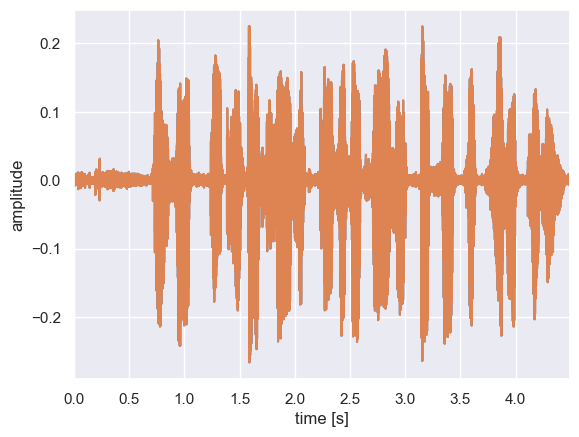

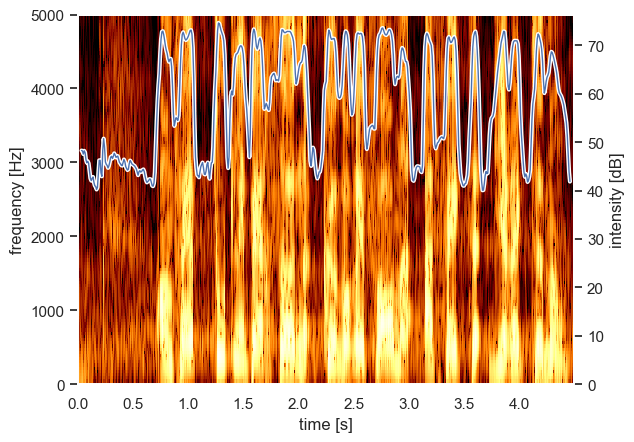

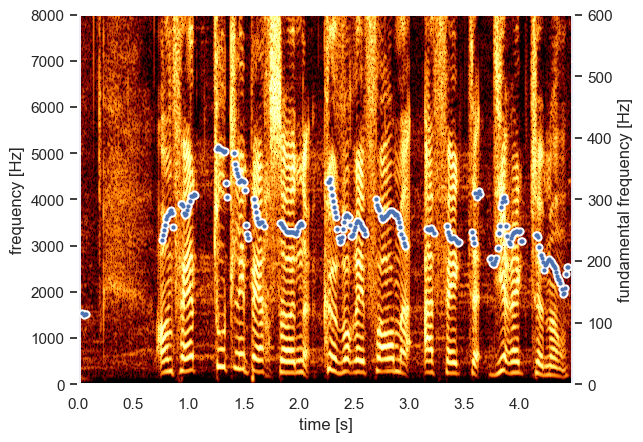

QG_20230404144514_1_1071010_1342160_144858_182089.wav


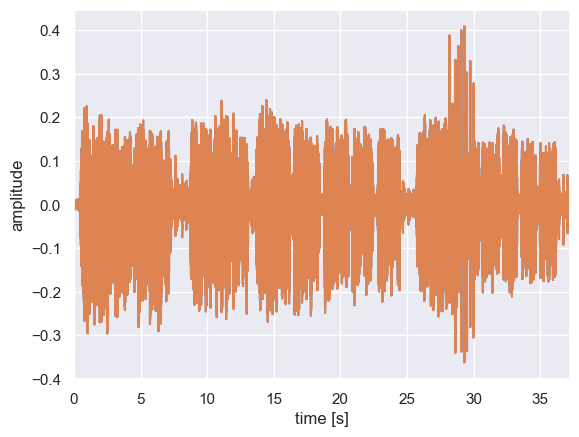

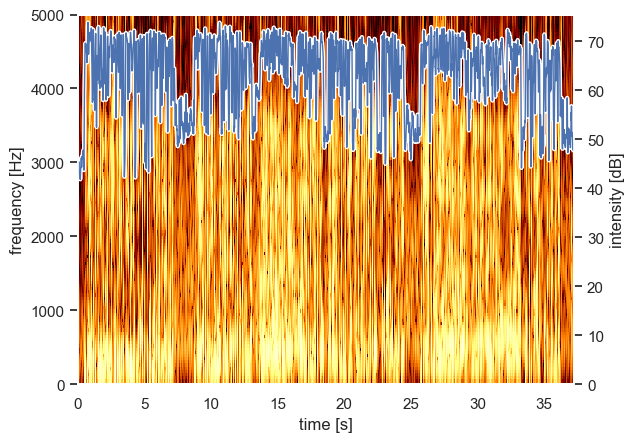

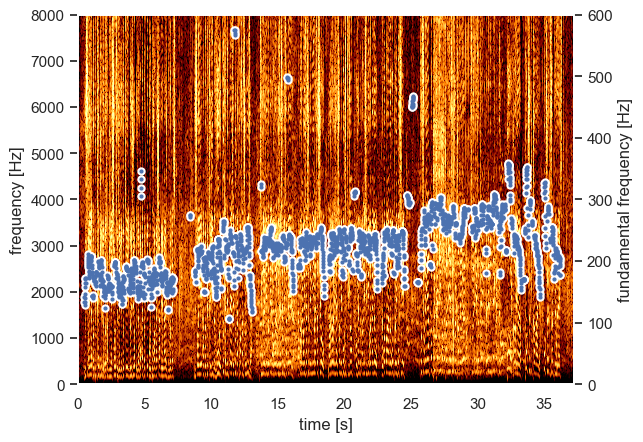

QG_20230404144514_1_3329410_3583690_9046_55482.wav


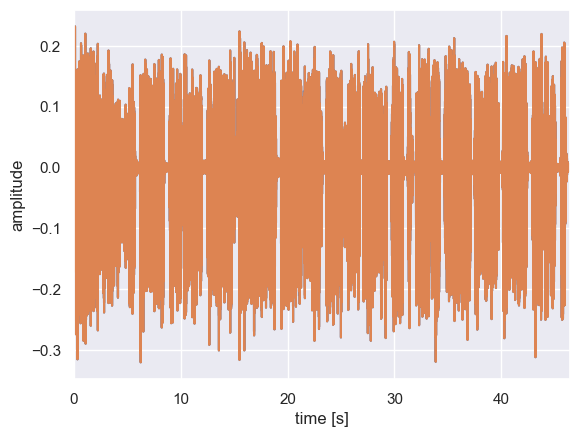

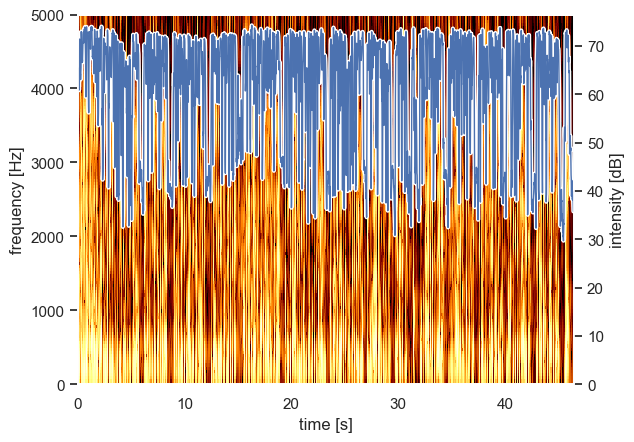

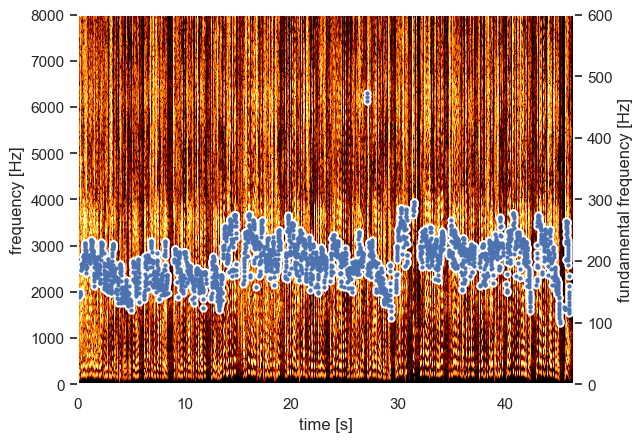

In [32]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Use seaborn's default style to make attractive graphs

def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")


for file in high_scores[:3]: 
    print(file)
    # Plot nice figures using Python's "standard" matplotlib library
    snd = parselmouth.Sound(LOCAL_PATH + f"/raw-audio/{file}")
    plt.figure()
    plt.plot(snd.xs(), snd.values.T)
    plt.xlim([snd.xmin, snd.xmax])
    plt.xlabel("time [s]")
    plt.ylabel("amplitude")
    plt.show() # or plt.save

    intensity = snd.to_intensity()
    spectrogram = snd.to_spectrogram()
    plt.figure()
    draw_spectrogram(spectrogram)
    plt.twinx()
    draw_intensity(intensity)
    plt.xlim([snd.xmin, snd.xmax])
    plt.show() # or plt.savefig("spectrogram.pdf")

    pitch = snd.to_pitch()
    # If desired, pre-emphasize the sound fragment before calculating the spectrogram
    pre_emphasized_snd = snd.copy()
    pre_emphasized_snd.pre_emphasize()
    spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
    plt.figure()
    draw_spectrogram(spectrogram)
    plt.twinx()
    draw_pitch(pitch)
    plt.xlim([snd.xmin, snd.xmax])
    plt.show() # or plt.savefig("spectrogram_0

In [78]:
import azure.cognitiveservices.speech as speechsdk

speech_config = speechsdk.SpeechConfig(subscription=env['AZURE_SPEECH_KEY'], region=env['AZURE_SPEECH_REGION'], speech_recognition_language="fr-FR")

QG_20230411144521_1_1294510_1540700_58812_75288.wav


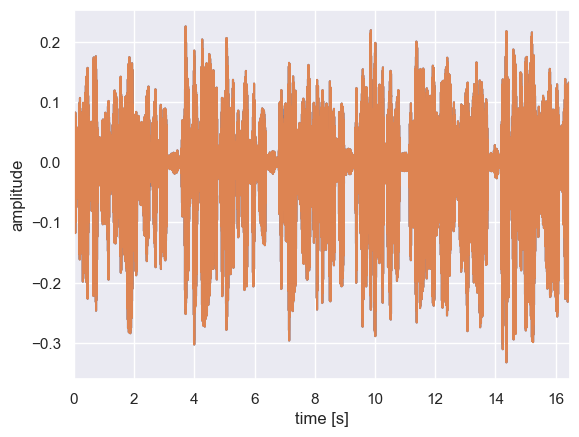

(1, 2052) 74.19539753551041 38.835219543694635 62.216041991826756 8.508674294967514
(116, 8233)


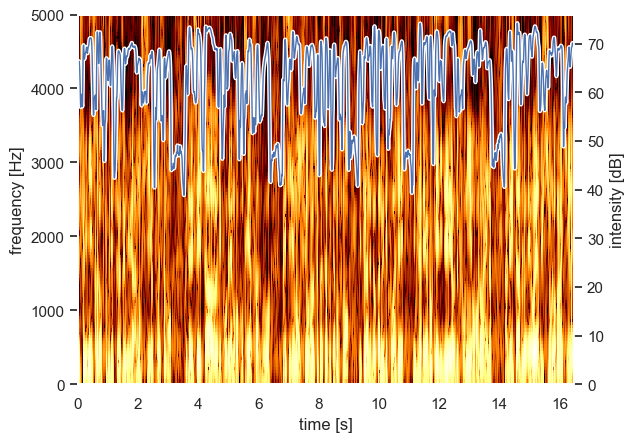

Object type: Pitch
Object name: <no name>
Date: Wed Nov 15 13:31:05 2023

Time domain:
   Start time: 0 seconds
   End time: 16.47598639455782 seconds
   Total duration: 16.47598639455782 seconds
Time sampling:
   Number of frames: 1644 (1152 voiced)
   Time step: 0.01 seconds
   First frame centred at: 0.022993197278910246 seconds
Ceiling at: 600 Hz

Estimated quantiles:
   10% = 125.796677 Hz = 113.285688 Mel = 3.97312573 semitones above 100 Hz = 3.67021268 ERB
   16% = 129.029993 Hz = 115.910861 Mel = 4.41247753 semitones above 100 Hz = 3.74996572 ERB
   50% = 143.844561 Hz = 127.781325 Mel = 6.29412809 semitones above 100 Hz = 4.10784267 ERB
   84% = 163.513563 Hz = 143.155742 Mel = 8.51292368 semitones above 100 Hz = 4.5648918 ERB
   90% = 169.475663 Hz = 147.732433 Mel = 9.13293741 semitones above 100 Hz = 4.69958746 ERB
Estimated spreading:
   84%-median = 19.68 Hz = 15.38 Mel = 2.22 semitones = 0.4572 ERB
   median-16% = 14.82 Hz = 11.88 Mel = 1.882 semitones = 0.358 ERB
   90%

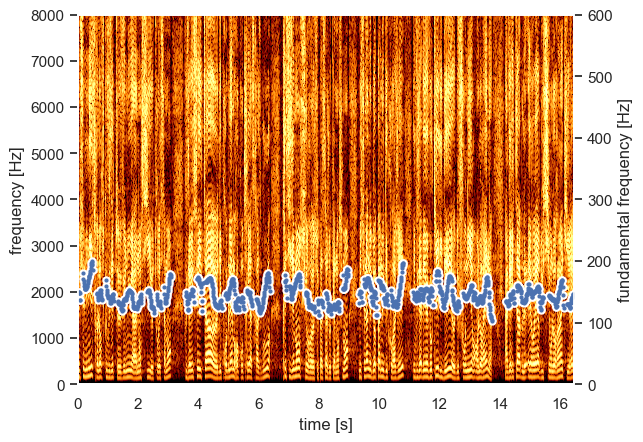

Object type: MFCC
Object name: <no name>
Date: Wed Nov 15 13:31:06 2023

Time domain:0 to 16.47598639455782 seconds
Number of frames: 3290
Time step: 0.005 seconds
First frame at: 0.01549319727891124 seconds
Maximum number of coefficients possible: 37
Maximum number of coefficients used: 12
Minimum frequency: 0 mel
Maximum frequency: 3900 mel

(13, 3290)


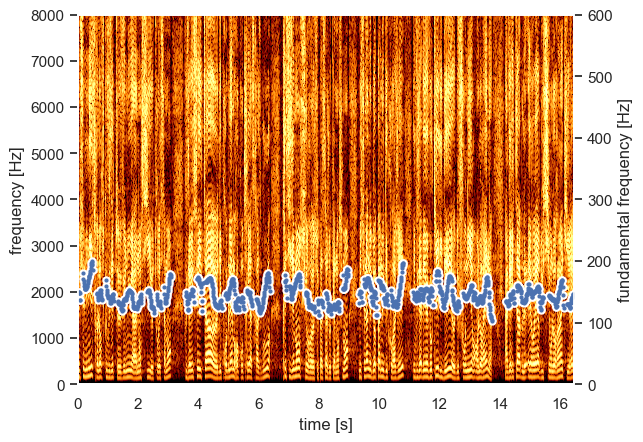

In [83]:
for file in low_scores[:1]: 
    print(file)
    # Plot nice figures using Python's "standard" matplotlib library
    snd = parselmouth.Sound(LOCAL_PATH + f"/raw-audio/{file}")
    plt.figure()
    plt.plot(snd.xs(), snd.values.T)
    plt.xlim([snd.xmin, snd.xmax])
    plt.xlabel("time [s]")
    plt.ylabel("amplitude")
    plt.show() # or plt.save

    # INTENSITY
    intensity = snd.to_intensity()
    print(intensity.values.shape, max(intensity.values[0]), np.min(intensity.values[0]), np.mean(intensity.values[0]), np.std(intensity.values[0]))
    spectrogram = snd.to_spectrogram()
    plt.figure()
    draw_spectrogram(spectrogram)
    print(spectrogram.values.shape)
    plt.twinx()
    draw_intensity(intensity)
    plt.xlim([snd.xmin, snd.xmax])
    plt.show() # or plt.savefig("spectrogram.pdf")

    # PITCH (FREQUENCE FONDAMENTALE)
    pitch = snd.to_pitch()
    print(pitch)
    # If desired, pre-emphasize the sound fragment before calculating the spectrogram
    pre_emphasized_snd = snd.copy()
    pre_emphasized_snd.pre_emphasize()
    spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
    plt.figure()
    draw_spectrogram(spectrogram)
    plt.twinx()
    draw_pitch(pitch)
    plt.xlim([snd.xmin, snd.xmax])
    plt.show() # or plt.savefig("spectrogram_0

    # MFCC (TIMBRE)
    mfcc_object = snd.to_mfcc(number_of_coefficients=12)
    mfcc = mfcc_object.to_array()
    print(mfcc_object)
    print(mfcc.shape)
    # moyenne de chacun des 13 coefficients MFCC
    # If desired, pre-emphasize the sound fragment before calculating the spectrogram
    pre_emphasized_snd = snd.copy()
    pre_emphasized_snd.pre_emphasize()
    spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
    plt.figure()
    draw_spectrogram(spectrogram)
    plt.twinx()
    draw_pitch(pitch)
    plt.xlim([snd.xmin, snd.xmax])
    plt.show() # or plt.savefig("spectrogram_0

